## Phase 2: Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Define paths relative to the script or notebook
weather_data_path = "C:/Users/a_farnoo/Documents/GitHub/BikeML/data/weather_data_2021.csv"
bixi_data_path = "C:/Users/a_farnoo/Documents/GitHub/BikeML/data/bixi_data_2021.csv"

In [3]:
# Load the data
weather_data = pd.read_csv(weather_data_path)
bixi_data = pd.read_csv(bixi_data_path)

In [4]:
# Display the first few rows
print(weather_data.head())
print(bixi_data.head())

   Longitude (x)  Latitude (y)     Station Name  Climate ID   Date/Time  Year  \
0         -73.74         45.47  MONTREAL INTL A     7025251  2021-01-01  2021   
1         -73.74         45.47  MONTREAL INTL A     7025251  2021-01-02  2021   
2         -73.74         45.47  MONTREAL INTL A     7025251  2021-01-03  2021   
3         -73.74         45.47  MONTREAL INTL A     7025251  2021-01-04  2021   
4         -73.74         45.47  MONTREAL INTL A     7025251  2021-01-05  2021   

   Month  Day  Data Quality  Max Temp (°C)  ... Total Snow (cm)  \
0      1    1           NaN           -0.9  ...             1.0   
1      1    2           NaN           -0.8  ...            11.4   
2      1    3           NaN           -0.8  ...             0.0   
3      1    4           NaN           -0.8  ...             0.6   
4      1    5           NaN           -2.7  ...             0.0   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               

In [5]:
print("Weather Data Missing Values:\n", weather_data.isnull().sum())
print("BIXI Data Missing Values:\n", bixi_data.isnull().sum())

Weather Data Missing Values:
 Longitude (x)                  0
Latitude (y)                   0
Station Name                   0
Climate ID                     0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 365
Max Temp (°C)                  2
Max Temp Flag                363
Min Temp (°C)                  2
Min Temp Flag                363
Mean Temp (°C)                 2
Mean Temp Flag               363
Heat Deg Days (°C)             2
Heat Deg Days Flag           363
Cool Deg Days (°C)             2
Cool Deg Days Flag           363
Total Rain (mm)                0
Total Rain Flag              341
Total Snow (cm)                0
Total Snow Flag              333
Total Precip (mm)              0
Total Precip Flag            314
Snow on Grnd (cm)            251
Snow on Grnd Flag            347
Dir of Max Gust (10s deg)    106
Dir of Max Gust Flag         268
Spd of Max Gu

In [6]:
print("Weather Data Types:\n", weather_data.dtypes)
print("BIXI Data Types:\n", bixi_data.dtypes)

Weather Data Types:
 Longitude (x)                float64
Latitude (y)                 float64
Station Name                  object
Climate ID                     int64
Date/Time                     object
Year                           int64
Month                          int64
Day                            int64
Data Quality                 float64
Max Temp (°C)                float64
Max Temp Flag                 object
Min Temp (°C)                float64
Min Temp Flag                 object
Mean Temp (°C)               float64
Mean Temp Flag                object
Heat Deg Days (°C)           float64
Heat Deg Days Flag            object
Cool Deg Days (°C)           float64
Cool Deg Days Flag            object
Total Rain (mm)              float64
Total Rain Flag               object
Total Snow (cm)              float64
Total Snow Flag               object
Total Precip (mm)            float64
Total Precip Flag             object
Snow on Grnd (cm)            float64
Snow on Grnd Flag

In [7]:
print(weather_data.describe())
print(bixi_data.describe())

       Longitude (x)  Latitude (y)  Climate ID    Year       Month  \
count         365.00  3.650000e+02       365.0   365.0  365.000000   
mean          -73.74  4.547000e+01   7025251.0  2021.0    6.526027   
std             0.00  7.115181e-15         0.0     0.0    3.452584   
min           -73.74  4.547000e+01   7025251.0  2021.0    1.000000   
25%           -73.74  4.547000e+01   7025251.0  2021.0    4.000000   
50%           -73.74  4.547000e+01   7025251.0  2021.0    7.000000   
75%           -73.74  4.547000e+01   7025251.0  2021.0   10.000000   
max           -73.74  4.547000e+01   7025251.0  2021.0   12.000000   

              Day  Data Quality  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
count  365.000000           0.0     363.000000     363.000000      363.000000   
mean    15.720548           NaN      13.127273       4.042149        8.593664   
std      8.808321           NaN      12.264939      11.388409       11.724482   
min      1.000000           NaN     -14.20000

### Step 3: Clean the Weather Data

In [8]:
weather_data = weather_data.drop(columns=['column_to_remove_1', 'column_to_remove_2'], errors='ignore')

In [9]:
weather_data

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.74,45.47,MONTREAL INTL A,7025251,2021-01-01,2021,1,1,NaN,-0.9,...,1.0,NaN,1.0,NaN,4.0,NaN,NaN,M,NaN,M
1,-73.74,45.47,MONTREAL INTL A,7025251,2021-01-02,2021,1,2,NaN,-0.8,...,11.4,NaN,11.6,NaN,10.0,NaN,36.0,NaN,41.0,NaN
2,-73.74,45.47,MONTREAL INTL A,7025251,2021-01-03,2021,1,3,NaN,-0.8,...,0.0,NaN,0.0,NaN,11.0,NaN,NaN,M,NaN,M
3,-73.74,45.47,MONTREAL INTL A,7025251,2021-01-04,2021,1,4,NaN,-0.8,...,0.6,NaN,0.6,NaN,11.0,NaN,NaN,M,NaN,M
4,-73.74,45.47,MONTREAL INTL A,7025251,2021-01-05,2021,1,5,NaN,-2.7,...,0.0,T,0.0,T,11.0,NaN,1.0,NaN,32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-73.74,45.47,MONTREAL INTL A,7025251,2021-12-27,2021,12,27,NaN,-3.5,...,0.0,T,0.0,T,4.0,NaN,5.0,NaN,40.0,NaN
361,-73.74,45.47,MONTREAL INTL A,7025251,2021-12-28,2021,12,28,NaN,-2.5,...,2.0,NaN,2.0,NaN,5.0,NaN,NaN,M,NaN,M
362,-73.74,45.47,MONTREAL INTL A,7025251,2021-12-29,2021,12,29,NaN,-2.9,...,0.0,NaN,0.0,NaN,5.0,NaN,NaN,M,NaN,M
363,-73.74,45.47,MONTREAL INTL A,7025251,2021-12-30,2021,12,30,NaN,-1.6,...,0.6,NaN,0.4,NaN,5.0,NaN,NaN,M,NaN,M


In [10]:
# List of columns to keep
columns_to_keep = [
    "Date/Time",          # Timestamp
    "Max Temp (°C)",      # Maximum temperature
    "Min Temp (°C)",      # Minimum temperature
    "Total Precip (mm)",  # Total precipitation
    "Snow on Grnd (cm)",  # Snow on ground
    "Spd of Max Gust (km/h)",  # Speed of max wind gust
    "Longitude (x)",      # Longitude (if spatial analysis is needed)
    "Latitude (y)"        # Latitude (if spatial analysis is needed)
]

In [14]:
# Filter the dataset
weather_data = weather_data[columns_to_keep]

In [15]:
# Display the resulting dataset
print(filtered_weather_data.head())

NameError: name 'filtered_weather_data' is not defined

In [16]:
weather_data.ffill(inplace=True)

In [17]:
weather_data.dropna(inplace=True)

In [18]:
weather_data

,Date/Time,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Longitude (x),Latitude (y)
1,2021-01-02,-0.8,-5.0,11.6,10.0,41.0,-73.74,45.47
2,2021-01-03,-0.8,-3.9,0.0,11.0,41.0,-73.74,45.47
3,2021-01-04,-0.8,-4.0,0.6,11.0,41.0,-73.74,45.47
4,2021-01-05,-2.7,-3.7,0.0,11.0,32.0,-73.74,45.47
5,2021-01-06,-1.0,-7.3,0.0,11.0,32.0,-73.74,45.47
...,...,...,...,...,...,...,...,...
360,2021-12-27,-3.5,-10.4,0.0,4.0,40.0,-73.74,45.47
361,2021-12-28,-2.5,-9.1,2.0,5.0,40.0,-73.74,45.47
362,2021-12-29,-2.9,-7.5,0.0,5.0,40.0,-73.74,45.47
363,2021-12-30,-1.6,-6.7,0.4,5.0,40.0,-73.74,45.47


### Step 4: Clean the BIXI Data

In [19]:
bixi_data = bixi_data[bixi_data['duration_sec'] > 0]

In [20]:
bixi_data['start_time'] = pd.to_datetime(bixi_data['start_date'])
bixi_data['end_time'] = pd.to_datetime(bixi_data['end_date'])

In [21]:
bixi_data['date'] = bixi_data['start_time'].dt.date

In [22]:
bixi_data = bixi_data.dropna(subset=['emplacement_pk_start', 'emplacement_pk_end'])

In [23]:
bixi_data

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_time,end_time,date
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0,2021-06-29 17:46:28.653,2021-06-29 19:33:25.700,2021-06-29
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0,2021-04-25 18:02:39.110,2021-04-25 18:13:26.139,2021-04-25
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1,2021-08-08 18:50:31.633,2021-08-08 18:58:57.585,2021-08-08
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1,2021-10-11 17:50:15.346,2021-10-11 18:25:31.726,2021-10-11
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1,2021-09-10 15:51:58.050,2021-09-10 16:21:01.403,2021-09-10
...,...,...,...,...,...,...,...,...,...
5566346,2021-11-10 18:17:49.654,1140,2021-11-10 18:24:40.643,928,410,1,2021-11-10 18:17:49.654,2021-11-10 18:24:40.643,2021-11-10
5566347,2021-11-11 14:55:04.039,1140,2021-11-11 14:59:41.446,1140,277,0,2021-11-11 14:55:04.039,2021-11-11 14:59:41.446,2021-11-11
5566348,2021-11-12 14:50:15.504,1140,2021-11-12 15:05:37.379,1140,921,1,2021-11-12 14:50:15.504,2021-11-12 15:05:37.379,2021-11-12
5566349,2021-11-13 07:00:16.679,1140,2021-11-13 07:15:10.760,945,894,1,2021-11-13 07:00:16.679,2021-11-13 07:15:10.760,2021-11-13


### Step 5: Merge the Datasets

In [24]:
weather_data = weather_data.copy()
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'], errors='coerce')

In [25]:
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'], errors='coerce')

In [26]:
weather_data['Date'] = weather_data['Date/Time'].dt.date

In [27]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

In [28]:
weather_data['Date'] = weather_data['Date'].dt.date

In [29]:
weather_data.rename(columns={'Date': 'date'}, inplace=True)

In [30]:
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date
bixi_data['date'] = pd.to_datetime(bixi_data['date']).dt.date

In [31]:
combined_data = pd.merge(bixi_data, weather_data, on='date', how='inner')

In [32]:
combined_data

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_time,end_time,date,Date/Time,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Longitude (x),Latitude (y)
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0,2021-06-29 17:46:28.653,2021-06-29 19:33:25.700,2021-06-29,2021-06-29,28.6,22.3,0.2,0.0,36.0,-73.74,45.47
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0,2021-04-25 18:02:39.110,2021-04-25 18:13:26.139,2021-04-25,2021-04-25,16.9,1.4,2.4,0.0,50.0,-73.74,45.47
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1,2021-08-08 18:50:31.633,2021-08-08 18:58:57.585,2021-08-08,2021-08-08,28.4,19.1,0.0,0.0,32.0,-73.74,45.47
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1,2021-10-11 17:50:15.346,2021-10-11 18:25:31.726,2021-10-11,2021-10-11,21.7,13.8,0.0,0.0,49.0,-73.74,45.47
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1,2021-09-10 15:51:58.050,2021-09-10 16:21:01.403,2021-09-10,2021-09-10,20.5,14.2,0.4,0.0,43.0,-73.74,45.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566326,2021-11-10 18:17:49.654,1140,2021-11-10 18:24:40.643,928,410,1,2021-11-10 18:17:49.654,2021-11-10 18:24:40.643,2021-11-10,2021-11-10,11.8,0.6,0.0,0.0,45.0,-73.74,45.47
5566327,2021-11-11 14:55:04.039,1140,2021-11-11 14:59:41.446,1140,277,0,2021-11-11 14:55:04.039,2021-11-11 14:59:41.446,2021-11-11,2021-11-11,8.5,-1.5,0.0,0.0,35.0,-73.74,45.47
5566328,2021-11-12 14:50:15.504,1140,2021-11-12 15:05:37.379,1140,921,1,2021-11-12 14:50:15.504,2021-11-12 15:05:37.379,2021-11-12,2021-11-12,10.8,3.4,21.8,0.0,43.0,-73.74,45.47
5566329,2021-11-13 07:00:16.679,1140,2021-11-13 07:15:10.760,945,894,1,2021-11-13 07:00:16.679,2021-11-13 07:15:10.760,2021-11-13,2021-11-13,8.1,0.9,3.0,0.0,32.0,-73.74,45.47


### Step 6: Validate the Combined Data

In [33]:
print("Combined Data Missing Values:\n", combined_data.isnull().sum())

Combined Data Missing Values:
 start_date                0
emplacement_pk_start      0
end_date                  0
emplacement_pk_end        0
duration_sec              0
is_member                 0
start_time                0
end_time                  0
date                      0
Date/Time                 0
Max Temp (°C)             0
Min Temp (°C)             0
Total Precip (mm)         0
Snow on Grnd (cm)         0
Spd of Max Gust (km/h)    0
Longitude (x)             0
Latitude (y)              0
dtype: int64


In [34]:
print(combined_data.info())
combined_data = combined_data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566331 entries, 0 to 5566330
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   start_date              object        
 1   emplacement_pk_start    int64         
 2   end_date                object        
 3   emplacement_pk_end      int64         
 4   duration_sec            int64         
 5   is_member               int64         
 6   start_time              datetime64[ns]
 7   end_time                datetime64[ns]
 8   date                    object        
 9   Date/Time               datetime64[ns]
 10  Max Temp (°C)           float64       
 11  Min Temp (°C)           float64       
 12  Total Precip (mm)       float64       
 13  Snow on Grnd (cm)       float64       
 14  Spd of Max Gust (km/h)  float64       
 15  Longitude (x)           float64       
 16  Latitude (y)            float64       
dtypes: datetime64[ns](3), float64(7), int64(4), ob

### Step 7: Save the Cleaned Data

In [35]:
import os

In [36]:
output_dir = 'BikeML/data'

In [37]:
os.makedirs(output_dir, exist_ok=True)

In [38]:
output_path = os.path.join(output_dir, 'combined_data.csv')
combined_data.to_csv(output_path, index=False)

In [39]:
print(f"File saved to {output_path}")

File saved to BikeML/data\combined_data.csv


## Phase 3: Exploratory Data Analysis (EDA)

### Step 1: Understand the Structure of the Data

In [45]:
print("Shape of the dataset:", combined_data.shape)

Shape of the dataset: (5566328, 12)


In [46]:
print(combined_data.head())

                start_date                 end_date  duration_sec  is_member  \
0  2021-06-29 17:46:28.653  2021-06-29 19:33:25.700          6417          0   
1  2021-04-25 18:02:39.110  2021-04-25 18:13:26.139           647          0   
2  2021-08-08 18:50:31.633  2021-08-08 18:58:57.585           505          1   
3  2021-10-11 17:50:15.346  2021-10-11 18:25:31.726          2116          1   
4  2021-09-10 15:51:58.050  2021-09-10 16:21:01.403          1743          1   

         date  Max Temp (°C)  Min Temp (°C)  Total Precip (mm)  \
0  2021-06-29           28.6           22.3                0.2   
1  2021-04-25           16.9            1.4                2.4   
2  2021-08-08           28.4           19.1                0.0   
3  2021-10-11           21.7           13.8                0.0   
4  2021-09-10           20.5           14.2                0.4   

   Snow on Grnd (cm)  Spd of Max Gust (km/h)  Longitude (x)  Latitude (y)  
0                0.0                    36.0  

In [47]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5566328 entries, 0 to 5566330
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   start_date              object 
 1   end_date                object 
 2   duration_sec            int64  
 3   is_member               int64  
 4   date                    object 
 5   Max Temp (°C)           float64
 6   Min Temp (°C)           float64
 7   Total Precip (mm)       float64
 8   Snow on Grnd (cm)       float64
 9   Spd of Max Gust (km/h)  float64
 10  Longitude (x)           float64
 11  Latitude (y)            float64
dtypes: float64(7), int64(2), object(3)
memory usage: 552.1+ MB
None


In [48]:
print(combined_data.describe())

       duration_sec     is_member  Max Temp (°C)  Min Temp (°C)  \
count  5.566328e+06  5.566328e+06   5.566328e+06   5.566328e+06   
mean   8.618048e+02  8.242225e-01   2.265056e+01   1.288995e+01   
std    1.810836e+03  3.806308e-01   6.291038e+00   6.014258e+00   
min    1.000000e+00  0.000000e+00   3.700000e+00  -3.600000e+00   
25%    3.660000e+02  1.000000e+00   1.940000e+01   8.900000e+00   
50%    6.420000e+02  1.000000e+00   2.380000e+01   1.370000e+01   
75%    1.091000e+03  1.000000e+00   2.740000e+01   1.730000e+01   
max    1.565260e+06  1.000000e+00   3.400000e+01   2.400000e+01   

       Total Precip (mm)  Snow on Grnd (cm)  Spd of Max Gust (km/h)  \
count       5.566328e+06       5.566328e+06            5.566328e+06   
mean        1.683448e+00       2.257862e-03            4.288228e+01   
std         4.590527e+00       6.716120e-02            9.161288e+00   
min         0.000000e+00       0.000000e+00            3.100000e+01   
25%         0.000000e+00       0.000000e+

In [49]:
# Keep only relevant columns
combined_data = combined_data[[
    'start_date',          # Trip start date
    'end_date',            # Trip end date
    'duration_sec',        # Trip duration in seconds
    'is_member',           # Membership status
    'date',                # Date for weather and trip aggregation
    'Max Temp (°C)',       # Maximum temperature
    'Min Temp (°C)',       # Minimum temperature
    'Total Precip (mm)',   # Total precipitation
    'Snow on Grnd (cm)',   # Snow on the ground
    'Spd of Max Gust (km/h)',  # Wind gust speed
    'Longitude (x)',       # Geographic longitude
    'Latitude (y)'         # Geographic latitude
]]

In [50]:
combined_data

,start_date,end_date,duration_sec,is_member,date,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h),Longitude (x),Latitude (y)
0,2021-06-29 17:46:28.653,2021-06-29 19:33:25.700,6417,0,2021-06-29,28.6,22.3,0.2,0.0,36.0,-73.74,45.47
1,2021-04-25 18:02:39.110,2021-04-25 18:13:26.139,647,0,2021-04-25,16.9,1.4,2.4,0.0,50.0,-73.74,45.47
2,2021-08-08 18:50:31.633,2021-08-08 18:58:57.585,505,1,2021-08-08,28.4,19.1,0.0,0.0,32.0,-73.74,45.47
3,2021-10-11 17:50:15.346,2021-10-11 18:25:31.726,2116,1,2021-10-11,21.7,13.8,0.0,0.0,49.0,-73.74,45.47
4,2021-09-10 15:51:58.050,2021-09-10 16:21:01.403,1743,1,2021-09-10,20.5,14.2,0.4,0.0,43.0,-73.74,45.47
...,...,...,...,...,...,...,...,...,...,...,...,...
5566326,2021-11-10 18:17:49.654,2021-11-10 18:24:40.643,410,1,2021-11-10,11.8,0.6,0.0,0.0,45.0,-73.74,45.47
5566327,2021-11-11 14:55:04.039,2021-11-11 14:59:41.446,277,0,2021-11-11,8.5,-1.5,0.0,0.0,35.0,-73.74,45.47
5566328,2021-11-12 14:50:15.504,2021-11-12 15:05:37.379,921,1,2021-11-12,10.8,3.4,21.8,0.0,43.0,-73.74,45.47
5566329,2021-11-13 07:00:16.679,2021-11-13 07:15:10.760,894,1,2021-11-13,8.1,0.9,3.0,0.0,32.0,-73.74,45.47


In [51]:
# Convert all column names to lowercase and replace spaces with underscores
combined_data.columns = combined_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [52]:
# Replace special characters in column names
combined_data.columns = combined_data.columns.str.replace(r'[^\w\s]', '', regex=True)

In [53]:
# Display updated column names
print(combined_data.columns)

Index(['start_date', 'end_date', 'duration_sec', 'is_member', 'date',
       'max_temp_c', 'min_temp_c', 'total_precip_mm', 'snow_on_grnd_cm',
       'spd_of_max_gust_kmh', 'longitude_x', 'latitude_y'],
      dtype='object')


In [54]:
combined_data

,start_date,end_date,duration_sec,is_member,date,max_temp_c,min_temp_c,total_precip_mm,snow_on_grnd_cm,spd_of_max_gust_kmh,longitude_x,latitude_y
0,2021-06-29 17:46:28.653,2021-06-29 19:33:25.700,6417,0,2021-06-29,28.6,22.3,0.2,0.0,36.0,-73.74,45.47
1,2021-04-25 18:02:39.110,2021-04-25 18:13:26.139,647,0,2021-04-25,16.9,1.4,2.4,0.0,50.0,-73.74,45.47
2,2021-08-08 18:50:31.633,2021-08-08 18:58:57.585,505,1,2021-08-08,28.4,19.1,0.0,0.0,32.0,-73.74,45.47
3,2021-10-11 17:50:15.346,2021-10-11 18:25:31.726,2116,1,2021-10-11,21.7,13.8,0.0,0.0,49.0,-73.74,45.47
4,2021-09-10 15:51:58.050,2021-09-10 16:21:01.403,1743,1,2021-09-10,20.5,14.2,0.4,0.0,43.0,-73.74,45.47
...,...,...,...,...,...,...,...,...,...,...,...,...
5566326,2021-11-10 18:17:49.654,2021-11-10 18:24:40.643,410,1,2021-11-10,11.8,0.6,0.0,0.0,45.0,-73.74,45.47
5566327,2021-11-11 14:55:04.039,2021-11-11 14:59:41.446,277,0,2021-11-11,8.5,-1.5,0.0,0.0,35.0,-73.74,45.47
5566328,2021-11-12 14:50:15.504,2021-11-12 15:05:37.379,921,1,2021-11-12,10.8,3.4,21.8,0.0,43.0,-73.74,45.47
5566329,2021-11-13 07:00:16.679,2021-11-13 07:15:10.760,894,1,2021-11-13,8.1,0.9,3.0,0.0,32.0,-73.74,45.47


### Step 2: Handle Missing Values

In [55]:
print("Missing Values:\n", combined_data.isnull().sum())

Missing Values:
 start_date             0
end_date               0
duration_sec           0
is_member              0
date                   0
max_temp_c             0
min_temp_c             0
total_precip_mm        0
snow_on_grnd_cm        0
spd_of_max_gust_kmh    0
longitude_x            0
latitude_y             0
dtype: int64


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

### Step 3: Univariate Analysis

In [57]:
print(combined_data['duration_sec'].describe())

count    5.566328e+06
mean     8.618048e+02
std      1.810836e+03
min      1.000000e+00
25%      3.660000e+02
50%      6.420000e+02
75%      1.091000e+03
max      1.565260e+06
Name: duration_sec, dtype: float64


In [58]:
combined_data['log_duration_sec'] = np.log1p(combined_data['duration_sec'])

In [59]:
combined_data.loc[:, 'log_duration_sec'] = np.log1p(combined_data['duration_sec'])

In [60]:
combined_data = combined_data.copy()
combined_data['log_duration_sec'] = np.log1p(combined_data['duration_sec'])

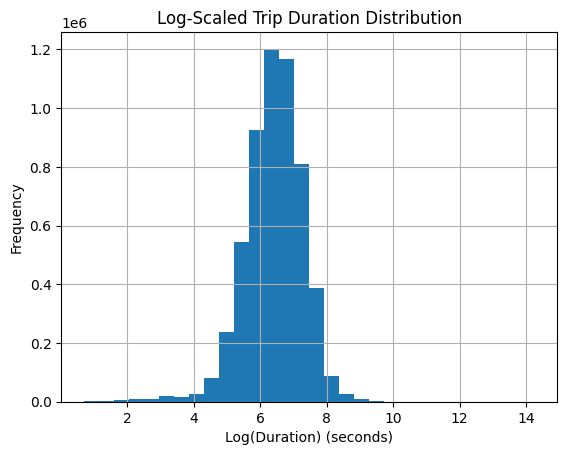

In [61]:
import numpy as np
combined_data['log_duration_sec'] = np.log1p(combined_data['duration_sec'])
combined_data['log_duration_sec'].hist(bins=30)
plt.title("Log-Scaled Trip Duration Distribution")
plt.xlabel("Log(Duration) (seconds)")
plt.ylabel("Frequency")
plt.show()

In [62]:
short_trips = combined_data[combined_data['duration_sec'] <= 120]
print("Short Trips Count:", short_trips.shape[0])

Short Trips Count: 179435


In [63]:
combined_data.groupby('is_member')['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
is_member,,,,,,,,
0,978435.0,1153.731179,2964.422896,1.0,513.0,835.0,1363.0,1565260.0
1,4587893.0,799.547286,1443.007570,1.0,343.0,604.0,1032.0,1272209.0


In [64]:
combined_data = combined_data[combined_data['duration_sec'] > 120]
print("Filtered Data Shape:", combined_data.shape)

Filtered Data Shape: (5386893, 13)


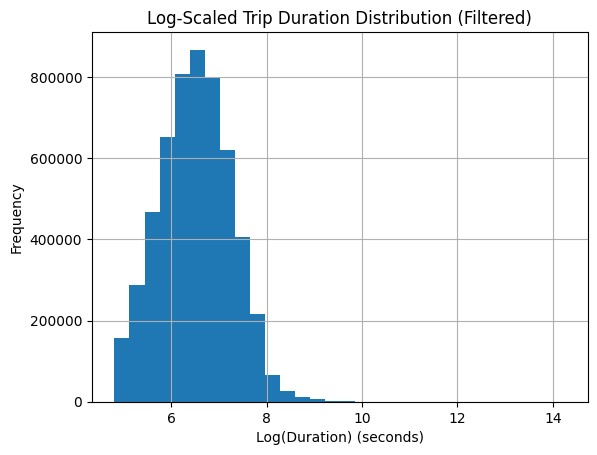

In [65]:
combined_data['log_duration_sec'] = np.log1p(combined_data['duration_sec'])
combined_data['log_duration_sec'].hist(bins=30)
plt.title("Log-Scaled Trip Duration Distribution (Filtered)")
plt.xlabel("Log(Duration) (seconds)")
plt.ylabel("Frequency")
plt.show()

In [66]:
membership_stats = combined_data.groupby('is_member')['duration_sec'].describe()
print(membership_stats)

               count         mean          std    min    25%    50%     75%  \
is_member                                                                     
0           961415.0  1173.185562  2986.903632  121.0  529.0  848.0  1376.0   
1          4425478.0   826.387901  1462.287939  121.0  367.0  626.0  1054.0   

                 max  
is_member             
0          1565260.0  
1          1272209.0  


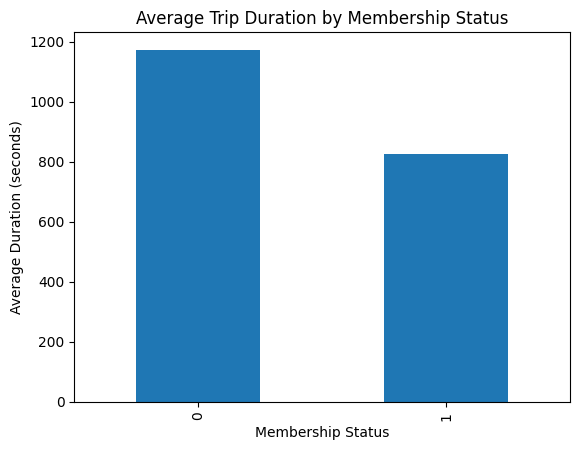

In [67]:
avg_duration_by_member = combined_data.groupby('is_member')['duration_sec'].mean()
avg_duration_by_member.plot(kind='bar')
plt.title("Average Trip Duration by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Average Duration (seconds)")
plt.show()

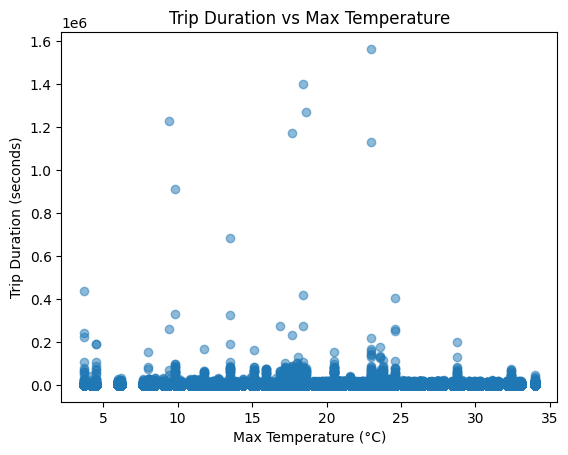

In [68]:
plt.scatter(combined_data['max_temp_c'], combined_data['duration_sec'], alpha=0.5)
plt.title("Trip Duration vs Max Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Trip Duration (seconds)")
plt.show()

In [69]:
long_trips = combined_data[combined_data['duration_sec'] > 10800]
print("Long Trips Count:", long_trips.shape[0])
print(long_trips.describe())

Long Trips Count: 3176
       duration_sec    is_member   max_temp_c   min_temp_c  total_precip_mm  \
count  3.176000e+03  3176.000000  3176.000000  3176.000000      3176.000000   
mean   2.374051e+04     0.538098    21.620277    11.373426         1.462469   
std    6.476075e+04     0.498625     6.742688     6.525997         4.501371   
min    1.080100e+04     0.000000     3.700000    -3.600000         0.000000   
25%    1.186050e+04     0.000000    17.700000     7.000000         0.000000   
50%    1.358550e+04     1.000000    23.000000    12.400000         0.000000   
75%    1.726675e+04     1.000000    26.300000    16.300000         0.400000   
max    1.565260e+06     1.000000    34.000000    24.000000        38.000000   

       snow_on_grnd_cm  spd_of_max_gust_kmh  longitude_x    latitude_y  \
count      3176.000000          3176.000000      3176.00  3.176000e+03   
mean          0.010076            42.416247       -73.74  4.547000e+01   
std           0.141619             8.986109

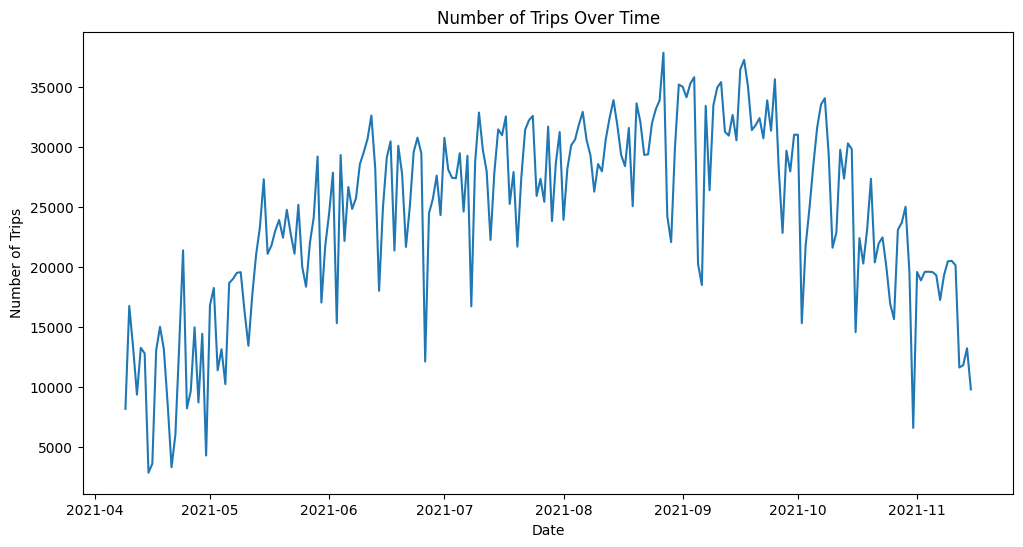

In [70]:
daily_trips = combined_data.groupby('date')['duration_sec'].count()
daily_trips.plot(figsize=(12, 6))
plt.title("Number of Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.show()

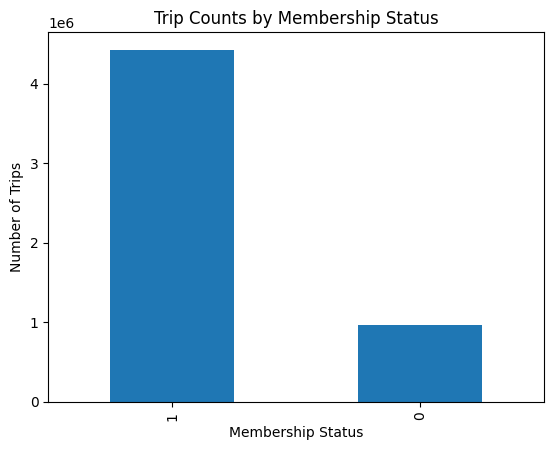

In [71]:
trip_counts_by_member = combined_data['is_member'].value_counts()
trip_counts_by_member.plot(kind='bar')
plt.title("Trip Counts by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Number of Trips")
plt.show()

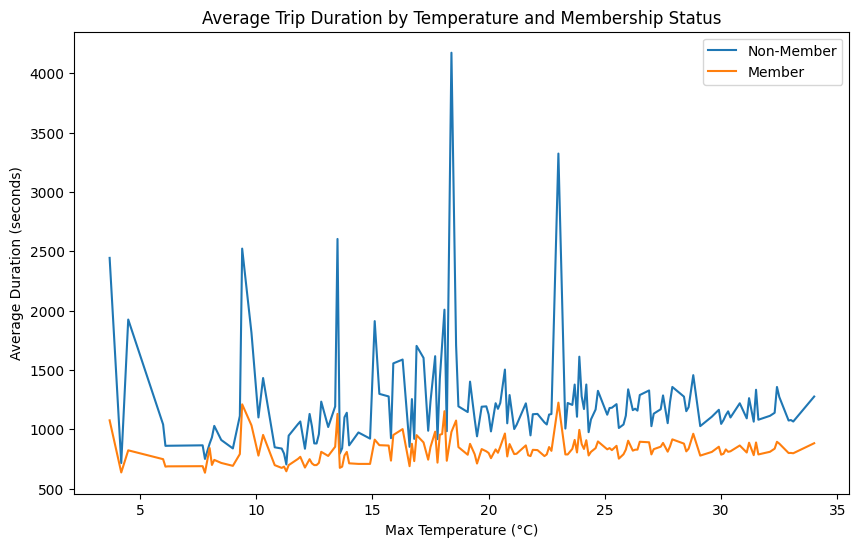

In [72]:
avg_duration_temp = combined_data.groupby(['is_member', 'max_temp_c'])['duration_sec'].mean().unstack(0)
avg_duration_temp.plot(kind='line', figsize=(10, 6))
plt.title("Average Trip Duration by Temperature and Membership Status")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Average Duration (seconds)")
plt.legend(["Non-Member", "Member"])
plt.show()

In [73]:
from scipy.stats import ttest_ind

non_member_durations = combined_data[combined_data['is_member'] == 0]['duration_sec']
member_durations = combined_data[combined_data['is_member'] == 1]['duration_sec']

t_stat, p_value = ttest_ind(non_member_durations, member_durations, equal_var=False)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 110.99116522529486
P-Value: 0.0


In [74]:
combined_data = combined_data[combined_data['duration_sec'] > 120]
print("Filtered Data Shape:", combined_data.shape)

Filtered Data Shape: (5386893, 13)


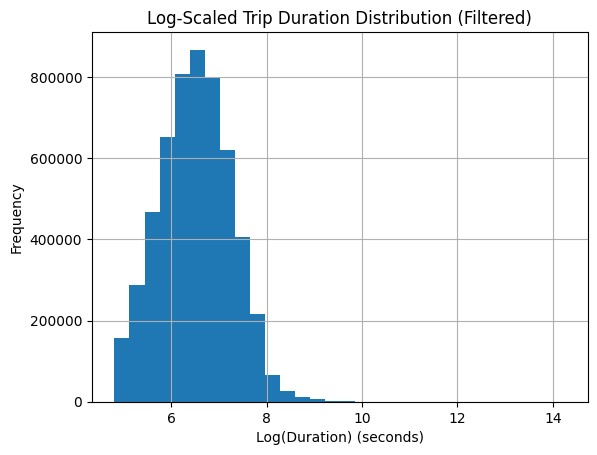

In [75]:
combined_data['log_duration_sec'] = np.log1p(combined_data['duration_sec'])
combined_data['log_duration_sec'].hist(bins=30)
plt.title("Log-Scaled Trip Duration Distribution (Filtered)")
plt.xlabel("Log(Duration) (seconds)")
plt.ylabel("Frequency")
plt.show()

In [76]:
membership_stats = combined_data.groupby('is_member')['duration_sec'].describe()
print(membership_stats)

               count         mean          std    min    25%    50%     75%  \
is_member                                                                     
0           961415.0  1173.185562  2986.903632  121.0  529.0  848.0  1376.0   
1          4425478.0   826.387901  1462.287939  121.0  367.0  626.0  1054.0   

                 max  
is_member             
0          1565260.0  
1          1272209.0  


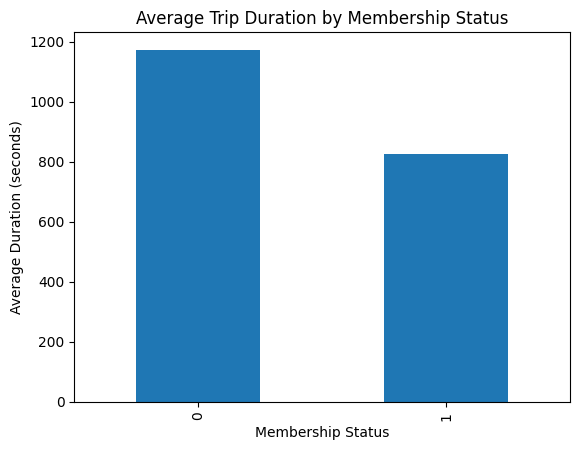

In [77]:
avg_duration_by_member = combined_data.groupby('is_member')['duration_sec'].mean()
avg_duration_by_member.plot(kind='bar')
plt.title("Average Trip Duration by Membership Status")
plt.xlabel("Membership Status")
plt.ylabel("Average Duration (seconds)")
plt.show()

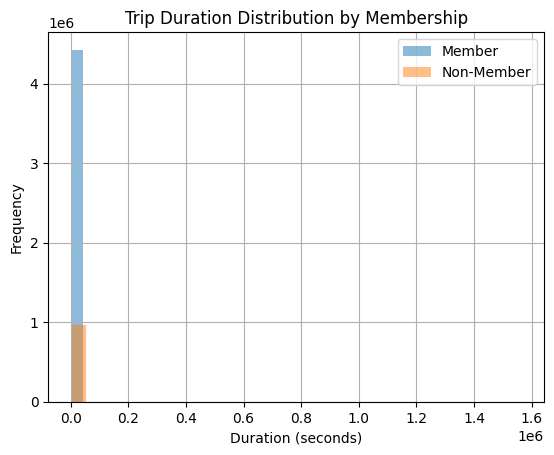

In [78]:
combined_data[combined_data['is_member'] == 1]['duration_sec'].hist(alpha=0.5, label='Member', bins=30)
combined_data[combined_data['is_member'] == 0]['duration_sec'].hist(alpha=0.5, label='Non-Member', bins=30)
plt.title("Trip Duration Distribution by Membership")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

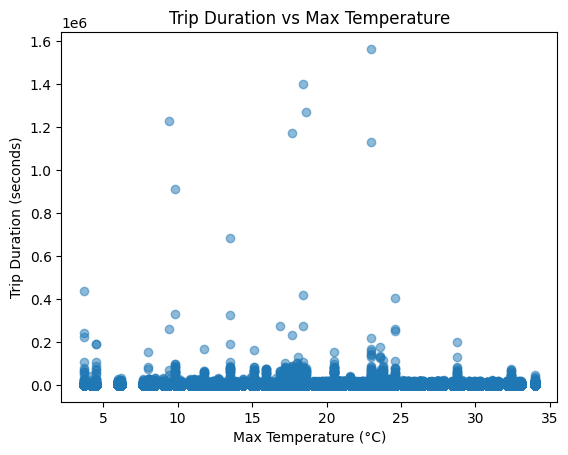

In [79]:
plt.scatter(combined_data['max_temp_c'], combined_data['duration_sec'], alpha=0.5)
plt.title("Trip Duration vs Max Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Trip Duration (seconds)")
plt.show()

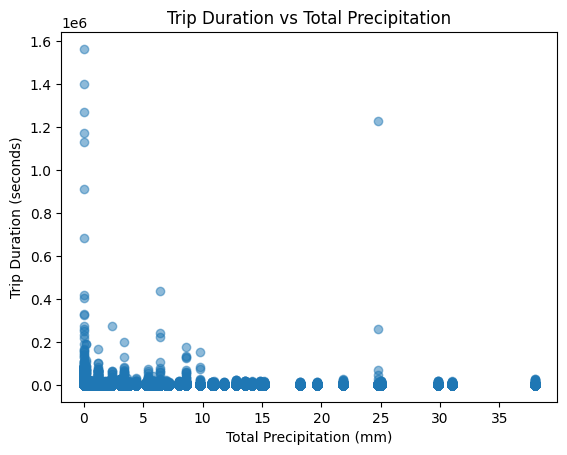

In [80]:
plt.scatter(combined_data['total_precip_mm'], combined_data['duration_sec'], alpha=0.5)
plt.title("Trip Duration vs Total Precipitation")
plt.xlabel("Total Precipitation (mm)")
plt.ylabel("Trip Duration (seconds)")
plt.show()

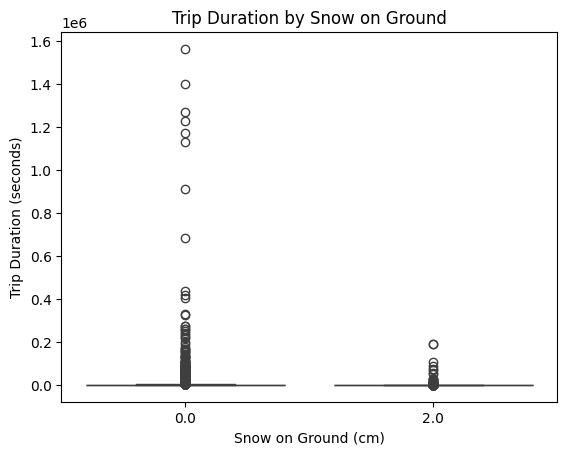

In [81]:
sns.boxplot(x=combined_data['snow_on_grnd_cm'], y=combined_data['duration_sec'])
plt.title("Trip Duration by Snow on Ground")
plt.xlabel("Snow on Ground (cm)")
plt.ylabel("Trip Duration (seconds)")
plt.show()

In [82]:
print(combined_data.dtypes)

start_date              object
end_date                object
duration_sec             int64
is_member                int64
date                    object
max_temp_c             float64
min_temp_c             float64
total_precip_mm        float64
snow_on_grnd_cm        float64
spd_of_max_gust_kmh    float64
longitude_x            float64
latitude_y             float64
log_duration_sec       float64
dtype: object


In [83]:
start_location_counts = combined_data.groupby(['longitude_x', 'latitude_y']).size().reset_index(name='trip_count')
print(start_location_counts.head())

   longitude_x  latitude_y  trip_count
0       -73.74       45.47     5386893


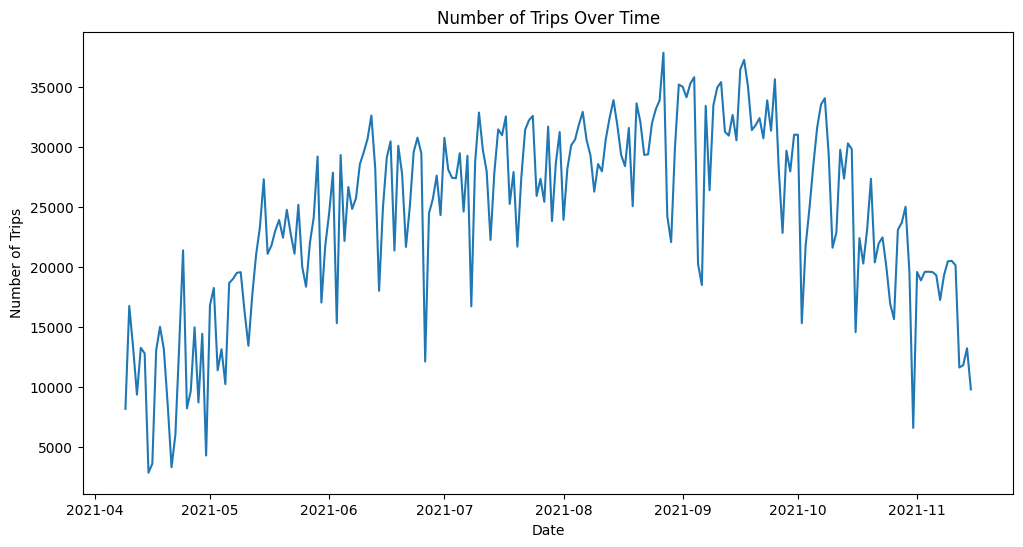

In [84]:
daily_trips = combined_data.groupby('date')['duration_sec'].count()
daily_trips.plot(figsize=(12, 6))
plt.title("Number of Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.show()

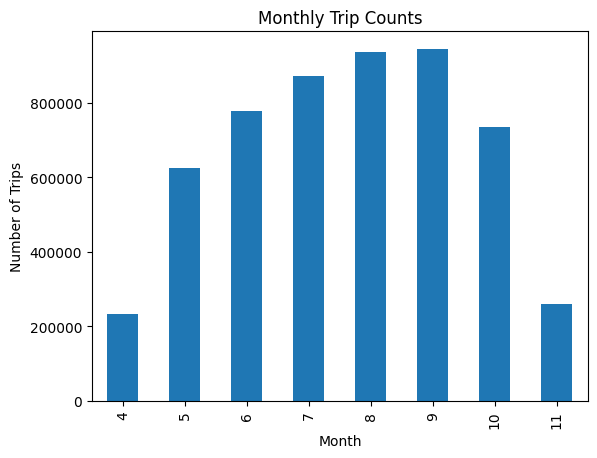

In [85]:
combined_data['month'] = pd.to_datetime(combined_data['date']).dt.month
monthly_trips = combined_data.groupby('month')['duration_sec'].count()
monthly_trips.plot(kind='bar')
plt.title("Monthly Trip Counts")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

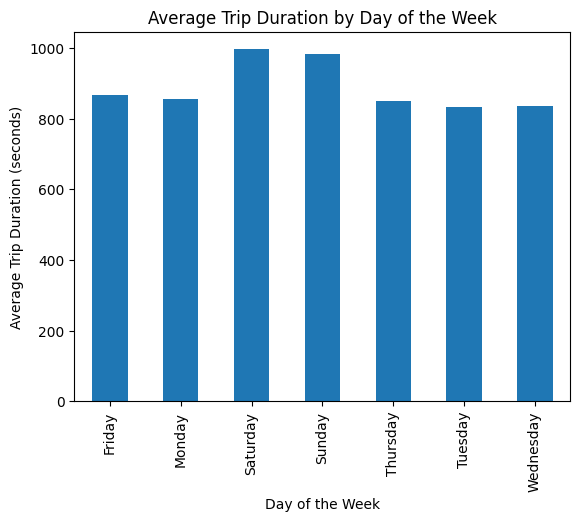

In [86]:
combined_data['day_of_week'] = pd.to_datetime(combined_data['date']).dt.day_name()
avg_trips_by_day = combined_data.groupby('day_of_week')['duration_sec'].mean()
avg_trips_by_day.plot(kind='bar')
plt.title("Average Trip Duration by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Duration (seconds)")
plt.show()

### Step 4: Document Findings

In [87]:
combined_data.to_csv("BikeML/data/refined_combined_data.csv", index=False)

In [88]:
plt.savefig("trip_duration_vs_temperature.png")

<Figure size 640x480 with 0 Axes>

In [89]:
import os
print(os.path.exists("BikeML/data/refined_combined_data.csv"))

True


## Phase 4: Feature Engineering

### Step 1: Add Time-Based Features

In [90]:
combined_data['start_date'] = pd.to_datetime(combined_data['start_date'])

In [91]:
combined_data['start_hour'] = combined_data['start_date'].dt.hour  # Hour of the trip
combined_data['start_day'] = combined_data['start_date'].dt.day  # Day of the month
combined_data['start_month'] = combined_data['start_date'].dt.month  # Month
combined_data['start_weekday'] = combined_data['start_date'].dt.dayofweek  # 0=Monday, 6=Sunday

In [92]:
combined_data['is_weekend'] = combined_data['start_weekday'].isin([5, 6]).astype(int)

In [93]:
combined_data['duration_min'] = combined_data['duration_sec'] / 60

In [94]:
### Step 2: Add Weather-Related Features

In [95]:
combined_data['temp_range_c'] = combined_data['max_temp_c'] - combined_data['min_temp_c']

In [96]:
combined_data['is_snowy'] = (combined_data['snow_on_grnd_cm'] > 0).astype(int)

In [97]:
combined_data['is_windy'] = (combined_data['spd_of_max_gust_kmh'] > 30).astype(int)  # Adjust threshold as needed

In [98]:
def categorize_temperature(temp):
    if temp < 5:
        return 'cold'
    elif temp < 20:
        return 'mild'
    else:
        return 'hot'

combined_data['temp_category'] = combined_data['max_temp_c'].apply(categorize_temperature)

### Step 3: Add Membership-Based Features

In [99]:
membership_agg = combined_data.groupby('is_member')['duration_sec'].mean()
print(membership_agg)

is_member
0    1173.185562
1     826.387901
Name: duration_sec, dtype: float64


In [100]:
combined_data['is_rainy'] = (combined_data['total_precip_mm'] > 0).astype(int)

In [101]:
print(combined_data.columns)

Index(['start_date', 'end_date', 'duration_sec', 'is_member', 'date',
       'max_temp_c', 'min_temp_c', 'total_precip_mm', 'snow_on_grnd_cm',
       'spd_of_max_gust_kmh', 'longitude_x', 'latitude_y', 'log_duration_sec',
       'month', 'day_of_week', 'start_hour', 'start_day', 'start_month',
       'start_weekday', 'is_weekend', 'duration_min', 'temp_range_c',
       'is_snowy', 'is_windy', 'temp_category', 'is_rainy'],
      dtype='object')


In [102]:
combined_data['member_rainy_trip'] = combined_data['is_member'] * combined_data['is_rainy']

In [103]:
print(combined_data[['is_member', 'is_rainy', 'member_rainy_trip']].head())

   is_member  is_rainy  member_rainy_trip
0          0         1                  0
1          0         1                  0
2          1         0                  0
3          1         0                  0
4          1         1                  1


In [104]:
print(combined_data.columns)

Index(['start_date', 'end_date', 'duration_sec', 'is_member', 'date',
       'max_temp_c', 'min_temp_c', 'total_precip_mm', 'snow_on_grnd_cm',
       'spd_of_max_gust_kmh', 'longitude_x', 'latitude_y', 'log_duration_sec',
       'month', 'day_of_week', 'start_hour', 'start_day', 'start_month',
       'start_weekday', 'is_weekend', 'duration_min', 'temp_range_c',
       'is_snowy', 'is_windy', 'temp_category', 'is_rainy',
       'member_rainy_trip'],
      dtype='object')


In [105]:
combined_data.columns = combined_data.columns.str.strip()

In [106]:
combined_data['member_rainy_trip'] = combined_data['is_member'] * combined_data['is_rainy']

### Step 4: Add Spatial Features

In [107]:
location_counts = combined_data.groupby(['longitude_x', 'latitude_y']).size().reset_index(name='trip_count')

In [108]:
combined_data = combined_data.merge(location_counts, on=['longitude_x', 'latitude_y'], how='left')

In [109]:
from math import radians, cos, sin, sqrt

In [110]:
def compute_distance(lat, lon, center_lat=45.5017, center_lon=-73.5673):
    # Haversine formula to calculate distance
    lat, lon, center_lat, center_lon = map(radians, [lat, lon, center_lat, center_lon])
    dlat = center_lat - lat
    dlon = center_lon - lon
    a = sin(dlat / 2) ** 2 + cos(lat) * cos(center_lat) * sin(dlon / 2) ** 2
    c = 2 * sqrt(a)
    distance = 6371 * c  # Radius of Earth in kilometers
    return distance

combined_data['distance_from_center_km'] = combined_data.apply(
    lambda row: compute_distance(row['latitude_y'], row['longitude_x']), axis=1
)

In [111]:
print(combined_data.isnull().sum())

start_date                 0
end_date                   0
duration_sec               0
is_member                  0
date                       0
max_temp_c                 0
min_temp_c                 0
total_precip_mm            0
snow_on_grnd_cm            0
spd_of_max_gust_kmh        0
longitude_x                0
latitude_y                 0
log_duration_sec           0
month                      0
day_of_week                0
start_hour                 0
start_day                  0
start_month                0
start_weekday              0
is_weekend                 0
duration_min               0
temp_range_c               0
is_snowy                   0
is_windy                   0
temp_category              0
is_rainy                   0
member_rainy_trip          0
trip_count                 0
distance_from_center_km    0
dtype: int64


In [112]:
print(combined_data.head())

               start_date                 end_date  duration_sec  is_member  \
0 2021-06-29 17:46:28.653  2021-06-29 19:33:25.700          6417          0   
1 2021-04-25 18:02:39.110  2021-04-25 18:13:26.139           647          0   
2 2021-08-08 18:50:31.633  2021-08-08 18:58:57.585           505          1   
3 2021-10-11 17:50:15.346  2021-10-11 18:25:31.726          2116          1   
4 2021-09-10 15:51:58.050  2021-09-10 16:21:01.403          1743          1   

         date  max_temp_c  min_temp_c  total_precip_mm  snow_on_grnd_cm  \
0  2021-06-29        28.6        22.3              0.2              0.0   
1  2021-04-25        16.9         1.4              2.4              0.0   
2  2021-08-08        28.4        19.1              0.0              0.0   
3  2021-10-11        21.7        13.8              0.0              0.0   
4  2021-09-10        20.5        14.2              0.4              0.0   

   spd_of_max_gust_kmh  ...  is_weekend  duration_min  temp_range_c  is_sn

In [113]:
combined_data.to_csv("BikeML/data/refined_combined_data_with_features.csv", index=False)

## Phase 5: Model Development

### Step 1: Define the Problem

In [114]:
# Predicting Trip Duration

### Step 2: Split the Dataset

In [115]:
features = [
    'max_temp_c', 'min_temp_c', 'temp_range_c', 'total_precip_mm',
    'snow_on_grnd_cm', 'spd_of_max_gust_kmh', 'is_rainy', 'is_snowy',
    'is_windy', 'start_hour', 'start_weekday', 'is_weekend',
    'longitude_x', 'latitude_y'
]
target = 'duration_sec'

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [117]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:
X = combined_data[features]
y = combined_data[target]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Train Multiple Models

In [120]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [121]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [122]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

### Step 4: Evaluate Model Performance

In [122]:
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [123]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))
    print("\n")

### Step 5: Tune Hyperparameters

In [124]:
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Performance of Linear Regression:
MAE: 523.8283096208969
MSE: 1197592.560253106
R²: 0.006108864971064665


Performance of Decision Tree:
MAE: 520.7152324323714
MSE: 1209179.1779187717
R²: -0.0035069567742216368


Performance of Random Forest:
MAE: 520.8132131137963
MSE: 1208684.7086935465
R²: -0.0030965930196302782


Performance of XGBoost:
MAE: 520.2613565966425
MSE: 1205053.2481077334
R²: -8.285045623779297e-05




In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

In [ ]:
rf_grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", rf_grid.best_params_)
best_rf_model = rf_grid.best_estimator_

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

In [ ]:
xgb_grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", xgb_grid.best_params_)
best_xgb_model = xgb_grid.best_estimator_